In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
path="/lustre/ytzheng/"

Casename = 'ASTEX_warm2.6'
Casename1 = 'ASTEX_warm5.2'
Casename2 = 'ASTEX_warm2.6_Div3'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f2 = xr.open_mfdataset(path + Casename2 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [75]:
f = f.isel(time = slice(0,60))
f1 = f1.isel(time = slice(0,60))
f2 = f2.isel(time = slice(0,60))
nt = f['time'].size
t_hours = np.arange(nt)

z = f['z']/1000.

myfontsize = 12

In [107]:
def plt2D(fig, ax, x, y, z, ztitle, mycmap=cm.coolwarm, mylevels=[0.], extend = 'neither',
         yrange = [0., 2.], xrange = [0., 59.], cbar = False, xlabel = False, ylabel = False, out = False):
    if len(mylevels) == 1:
#         norm = cm.colors.BoundaryNorm(mylevels,256)
        oax = ax.contourf(x,y,z, cmap = mycmap, extend = extend)
    else:
        oax = ax.contourf(x,y,z, cmap = mycmap, levels = mylevels, extend = extend)
    
    if cbar:
        cbar = fig.colorbar(oax, ax = ax, orientation='horizontal', 
                            shrink=0.8, pad = 0.3,ticks = [0.1, 5., 90])
        cbar.set_label('', fontsize=0.5*myfontsize)
    
    ax.set_ylim(yrange)
    ax.set_xlim(xrange)
    if ylabel:
        ax.set_ylabel('Height (km)', fontsize=myfontsize) 
    
    if xlabel:
        ax.set_xlabel('Time (h)', fontsize=myfontsize) 
        
#     ax.grid(True)
    if out:
        return oax

In [93]:
def pltprf(ax, var1, var2, var3, z1, z2, z3, ind_tmp, ind_tmp1, ind_tmp2,
           xlim,
           xlabel = ' ', ylabel = ''):
    
    ax.plot(var1, z1, linewidth=2, label = 'WADV', color = 'crimson')
    ax.plot(var2, z2, linewidth=2, label = 'WADV5.2', color = 'forestgreen')
    ax.plot(var3, z3, linewidth=2, label = 'WADV Div3', color = 'orange')
    
    ax.plot(var1[ind_tmp], z1[ind_tmp], 'o', color = 'crimson')
    ax.plot(var2[ind_tmp1], z2[ind_tmp1], 'o', color = 'forestgreen')
    ax.plot(var3[ind_tmp2], z3[ind_tmp2], 'o', color = 'orange')

    ax.set_ylabel(ylabel, fontsize=myfontsize) 
    ax.set_xlabel(xlabel, fontsize=myfontsize) 
    
    ax.set_ylim([0., 1.1])
    ax.set_xlim(xlim)
    
    ax.grid(True)

In [50]:
ind = 30
ind_tmp = f.TL2[ind].where(f.z < 0.6*1000.*f.ZINV[ind]).argmax(
    dim = 'z', skipna = 'True').values
ind_tmp1 = f1.TL2[ind].where(f1.z < 0.6*1000.*f1.ZINV[ind]).argmax(
    dim = 'z', skipna = 'True').values
ind_tmp2 = f2.TL2[ind].where(f2.z < 0.6*1000.*f2.ZINV[ind]).argmax(
    dim = 'z', skipna = 'True').values

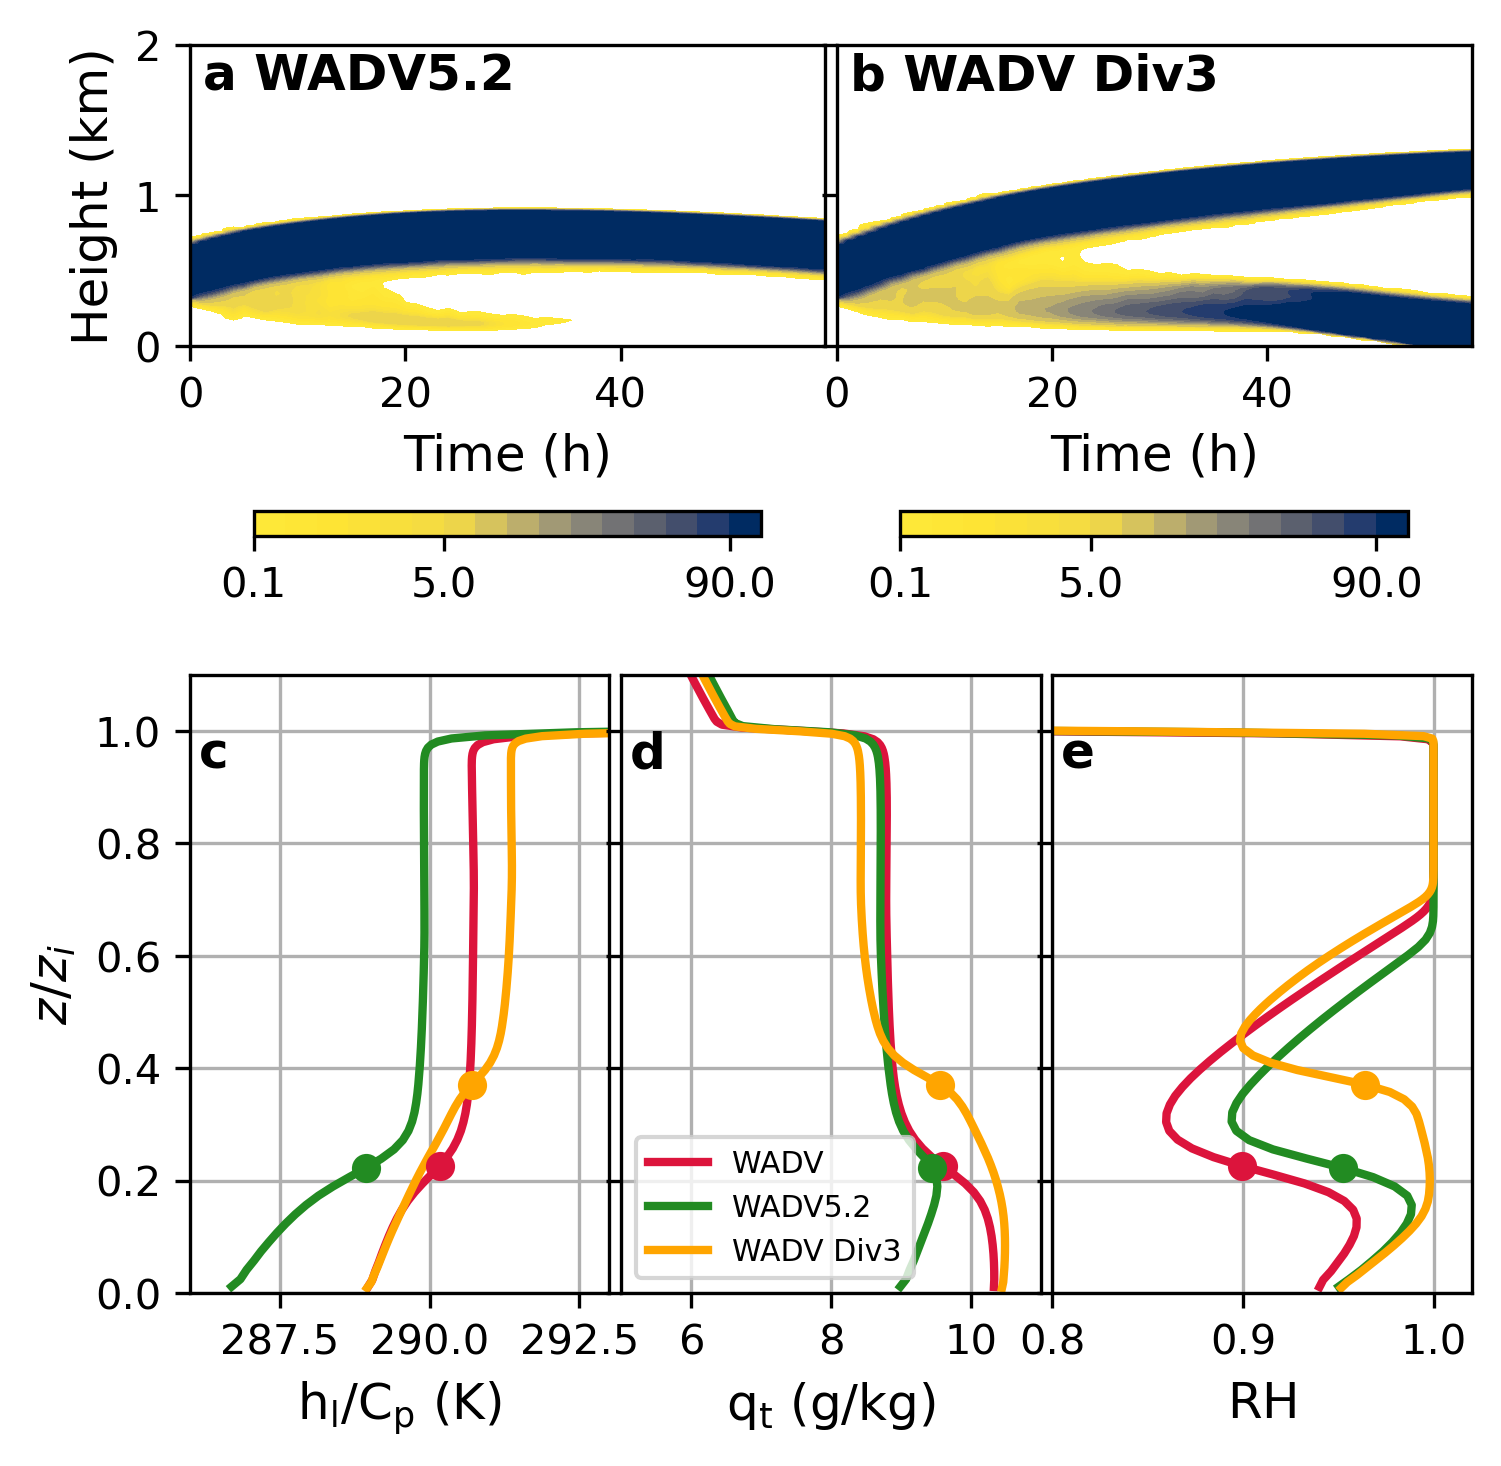

In [119]:
ind =30

fig = plt.figure(figsize=(14/2.54, (14)/2.54), dpi = 300)

plt.tight_layout()

ax1 = plt.subplot2grid((18, 18), (0, 0), colspan=9, rowspan = 8)
ax2 = plt.subplot2grid((18, 18), (0, 9), colspan=9, rowspan = 8)
ax3 = plt.subplot2grid((18, 18), (9, 0), colspan=6, rowspan = 9)
ax4 = plt.subplot2grid((18, 18), (9, 6), colspan=6, rowspan = 9)
ax5 = plt.subplot2grid((18, 18), (9, 12), colspan=6, rowspan = 9)

mylevels = [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt2D(fig, ax1, t_hours, z, 100.*f1['CLD'].T, 'Cloud cover (%)', mycmap=cm.cividis_r, 
      mylevels=mylevels, xlabel = True, ylabel = True, cbar = True)

plt2D(fig, ax2, t_hours, z, 100.*f2['CLD'].T, 'Cloud cover (%)', mycmap=cm.cividis_r, 
      mylevels=mylevels, xlabel = True, cbar = True)

pltprf(ax3, f['TL'][ind], f1['TL'][ind], f2['TL'][ind],
       z/f.ZINV[ind], z/f1.ZINV[ind], z/f2.ZINV[ind],
       ind_tmp,ind_tmp1,ind_tmp2,
       [286, 293],
       xlabel = r"$\mathrm{h_l/C_p \ (K)}$", ylabel = '$z/z_i$')

pltprf(ax4, f['QT'][ind], f1['QT'][ind], f2['QT'][ind],
       z/f.ZINV[ind], z/f1.ZINV[ind], z/f2.ZINV[ind],
       ind_tmp,ind_tmp1,ind_tmp2,
       [5, 11],
       xlabel = r"$\mathrm{q_t \ (g/kg)}$")

pltprf(ax5, f['QV'][ind]/f['QSAT'][ind], f1['QV'][ind]/f1['QSAT'][ind], f2['QV'][ind]/f2['QSAT'][ind],
       z/f.ZINV[ind], z/f1.ZINV[ind], z/f2.ZINV[ind],
       ind_tmp,ind_tmp1,ind_tmp2,
       [0.8, 1.02],
       xlabel = r"$\mathrm{RH}$")

ax2.axes.yaxis.set_ticklabels([])
ax4.axes.yaxis.set_ticklabels([])
ax5.axes.yaxis.set_ticklabels([])

ax4.legend(loc="lower left", fontsize=0.6*myfontsize)

axs = [ax1, ax2, ax3, ax4, ax5]

for i, label in enumerate(('a WADV5.2', 'b WADV Div3','c', 'd', 'e')):
    axs[i].text(0.02, 0.85, label, transform=axs[i].transAxes,
                fontsize=myfontsize, fontweight='bold')

fig.savefig('plot_result3_time_height_and_profile.png', dpi=fig.dpi, bbox_inches='tight')